In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [80]:
# TODO
df = pd.read_csv("./heart.csv")

In [81]:
df_without_target = df.drop('target', axis=1)

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [84]:
print(df.columns)
print(len(df.columns))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
14


In [85]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
783,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
181,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
738,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
531,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
753,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1


In [86]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [87]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [89]:
df["target"].unique()

array([0, 1])

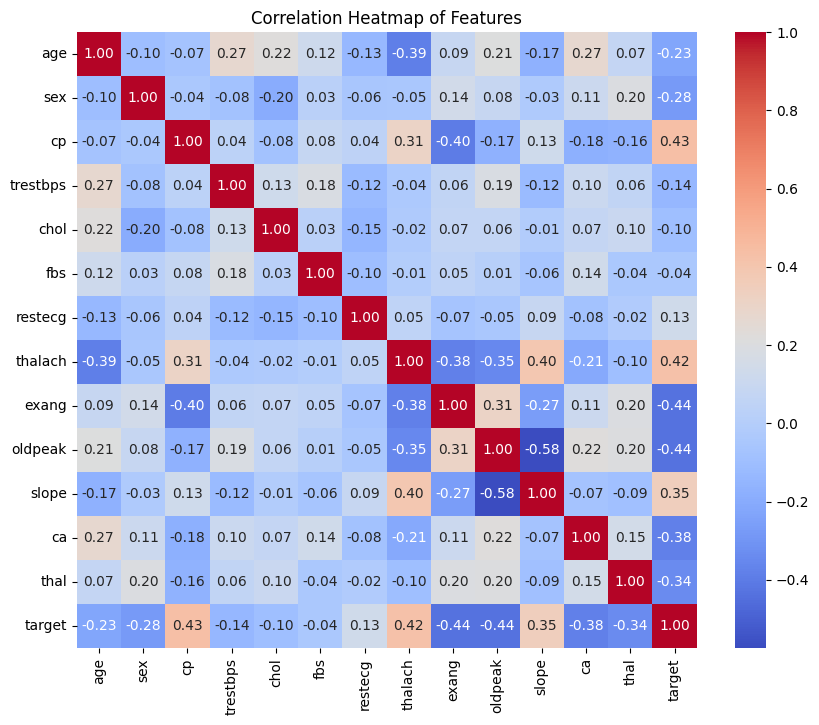

In [90]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [11]:
feature_list = [feature for feature in df_without_target.columns]
print("There are",len(feature_list),"features found in the data")

There are 13 features found in the data


In [12]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df_without_target[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df_without_target[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 8
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [22]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    learning_rate = 0.2
    epochs = 5000
    w = np.zeros(X.shape[1])

    for _ in range(epochs):
        loss = 0
        for i in range(len(X)):
            if np.sum(Y[i] * np.dot(X[i], w)) + X[i][-1] <= 0:
                w = w + learning_rate * Y[i] * X[i]
                X[i][-1] = y[i] + X[i][-1]

    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [23]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    learning_rate = 0.2
    epochs = 5000
    w = np.zeros(X.shape[1])
    errors = [] 
    
    for epoch in range(epochs):
        loss = 0
        for i in range(len(X)):
            if np.sum(Y[i] * np.dot(X[i], w)) + X[i][-1] <= 0:
                loss += 1 - np.sum(y[i] * np.dot(X[i],w))
                w = w + learning_rate * Y[i] * X[i]
                X[i][-1] = y[i] + X[i][-1]        
        errors.append(loss)
    
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

In [24]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].replace(0,-1).to_numpy()

In [25]:

# add a -1 bias term to the end of each row
bias_column = (np.ones(X.shape[0]) * -1).reshape(X.shape[0],1)

# Concatenate the original X with the bias column
X = np.concatenate([X,bias_column], axis=1)

In [26]:
# TODO: Split the data to train and test with a 0.2 ratio
row_count = X.shape[0]
X_train, X_val, y_train, y_val = X[:int(row_count*0.8)],X[int(row_count*0.8):], y[:int(row_count*0.8)], y[int(row_count*0.8):]

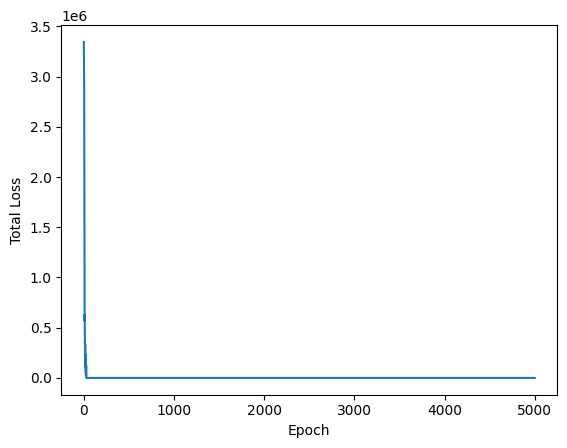

In [27]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [28]:
def accuracy_score(y_true, y_pred):
    correct = sum(t == p for t,p in zip(y_true,y_pred))
    accuracy = correct / len(y_true)
    
    return accuracy

Get the accuracy of your model using the function you implemented.

In [29]:
# TODO
def check(x):
    if np.sum(x) >= 0:
        return 1
    else:
        return -1

predictions = list(map(check,np.dot(X_val,w)))

print(accuracy_score(y_val, predictions))

0.7024390243902439


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [30]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)))
    label_index = {label: index for index, label in enumerate(labels)}
    # TODO: Populate the confusion matrix
    for a, p in zip(actual, predicted):
        actual_index = label_index[a]
        predicted_index = label_index[p]
        matrix[label_index[a], label_index[p]] += 1
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [31]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    thresh = matrix.max() / 2.
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, format(matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > thresh else "black")

    plt.show()

Now plot the confusion matrix for your model:

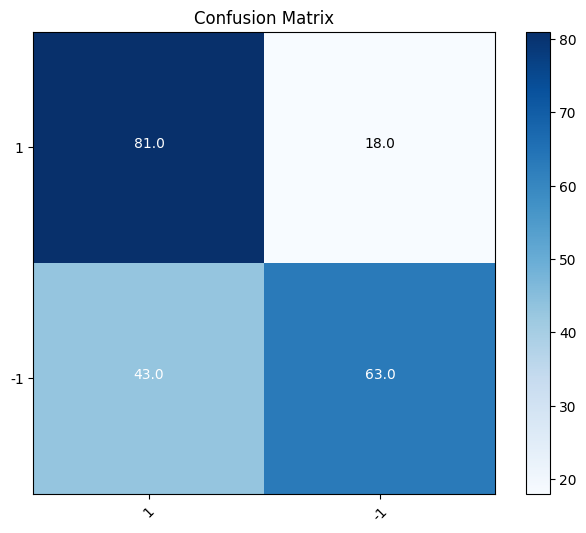

In [32]:
# TODO
confus_matrix = confusion_matrix(y_val, predictions, labels=[1,-1])
plot_confusion_matrix(confus_matrix, labels=[1,-1])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [33]:
def recall_score(confus_matrix):
    true_positives = np.diag(confus_matrix)
    false_negatives = np.sum(confus_matrix, axis=1) - true_positives
    recalls = true_positives / (true_positives + false_negatives)
    overall_recall = np.mean(recalls)
    return overall_recall
  
print(recall_score(confus_matrix))

0.7062607204116638


In [34]:
def precision_score(confus_matrix):
    true_positives = np.diag(confus_matrix)
    false_positives = np.sum(confus_matrix, axis=0) - true_positives
    precisions = true_positives / (true_positives + false_positives)
    overall_precision = np.mean(precisions)
    return overall_precision

print(precision_score(confus_matrix))

0.7155017921146953


In [35]:
def f1_score(cm):
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1 = np.nan_to_num(f1)
    overall_f1 = np.mean(f1)    
    return overall_f1

print(f1_score(confus_matrix))

0.7001270952734946


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [36]:
import numpy as np
import pandas as pd

class MixedDataNB:
    def __init__(self):
        self.cat_stats = {}
        self.cont_means = {}
        self.cont_stds = {}
        self.class_priors = {}
        self.epsilon = 1e-6  # Small constant to prevent log(0)
    
    def fit(self, X_cat, X_cont, y):
        self.classes = np.unique(y)
        n_samples = len(y)
        
        for cls in self.classes:
            cls_indices = np.where(y == cls)[0]
            self.class_priors[cls] = len(cls_indices) / n_samples
            
            if not X_cat.empty:
                X_cat_cls = X_cat.iloc[cls_indices]
                cat_vals = np.unique(X_cat)
                self.cat_stats[cls] = {cat_val: ((X_cat_cls == cat_val).sum(axis=0) + 1) / (len(X_cat_cls) + len(cat_vals)) for cat_val in cat_vals}
            
            if not X_cont.empty:
                X_cont_cls = X_cont.iloc[cls_indices]
                self.cont_means[cls] = np.mean(X_cont_cls, axis=0)
                self.cont_stds[cls] = np.std(X_cont_cls, axis=0, ddof=1)  # ddof=1 for sample standard deviation
    
    def predict(self, X_cat, X_cont):
        cat_columns = X_cat.columns
        cont_columns = X_cont.columns
        predictions = []
        
        for idx in range(len(X_cat)):
            row_cat = X_cat.iloc[idx]
            row_cont = X_cont.iloc[idx]
            posteriors = np.array([self._compute_posterior(row_cat, row_cont, cls, cat_columns, cont_columns) for cls in self.classes])
            predictions.append(self.classes[np.argmax(posteriors)])
                
        return predictions

    def _compute_posterior(self, row_cat, row_cont, cls, cat_columns, cont_columns):
        likelihood_cat = np.sum([np.log(self.cat_stats[cls].get(row_cat[col], self.epsilon)) for col in cat_columns])
        likelihood_cont = np.sum([np.log(self.gaussian_pdf(row_cont[col], self.cont_means[cls][col], self.cont_stds[cls][col]) + self.epsilon) for col in cont_columns])
        log_prior = np.log(self.class_priors[cls])
        
        return log_prior + likelihood_cat + likelihood_cont
    
    def gaussian_pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [37]:
row_count = X.shape[0]
X_train, X_val, y_train, y_val = df_without_target.loc[:int(row_count*0.8)],df_without_target.loc[int(row_count*0.8):], y[:int(row_count*0.8)], y[int(row_count*0.8):]

### Model training

In [38]:
cont_feature=[feature for feature in feature_list if len(df_without_target[feature].unique())>25]
discrete_feature=[feature for feature in feature_list if len(df_without_target[feature].unique())<25]


mixed_nb = MixedDataNB()
mixed_nb.fit(X_train[discrete_feature], X_train[cont_feature], y_train)

### Make predictions

In [39]:
# TODO
predictions = mixed_nb.predict(X_val[discrete_feature],X_val[cont_feature])

### Accuracy

Get the accuracy of your model using the function you implemented.

In [40]:
print(accuracy_score(y_val, predictions))

0.5707317073170731


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

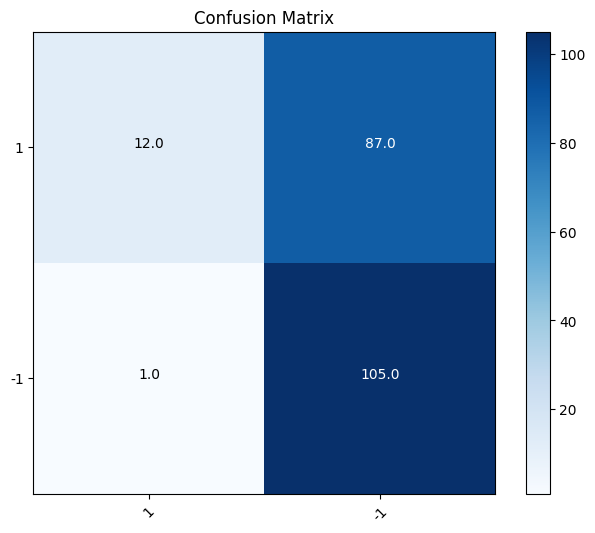

In [41]:
# TODO
conf_matrix = confusion_matrix(y_val, predictions, labels=[1,-1])
plot_confusion_matrix(conf_matrix,labels=[1,-1])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [42]:
print(recall_score(conf_matrix))

0.5558890794739851


In [43]:
print(precision_score(conf_matrix))

0.7349759615384616


In [44]:
print(f1_score(conf_matrix))

0.4594918504314478


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


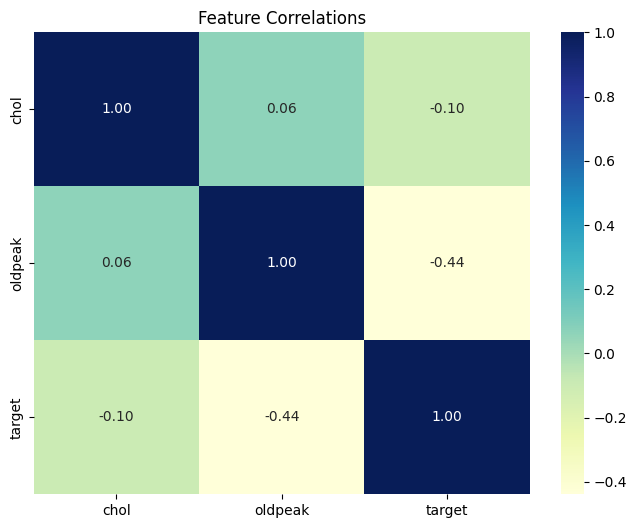

In [45]:
# TODO
corr = df[['chol', 'oldpeak', 'target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Feature Correlations')
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [46]:
# TODO
mixed_nb = MixedDataNB()

n_chol = cont_feature.copy()
n_chol.remove('chol')
mixed_nb.fit(X_train[discrete_feature], X_train[n_chol], y_train)
predictions = mixed_nb.predict(X_val[discrete_feature],X_val[n_chol])
print(accuracy_score(y_val, predictions))

0.5658536585365853


Remove oldpeak and test model

In [47]:
# TODO
mixed_nb = MixedDataNB()


n_oldpeak = cont_feature.copy()
n_oldpeak.remove('oldpeak')
mixed_nb.fit(X_train[discrete_feature], X_train[n_oldpeak], y_train)
predictions = mixed_nb.predict(X_val[discrete_feature],X_val[n_oldpeak])
print(accuracy_score(y_val, predictions))

0.5365853658536586


Comparison

**Answer:**

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [48]:
df1 = pd.read_csv("./Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [49]:
# TODO
print(df1['target'].unique())
for i in df1['target'].unique():
    print(f'class {i}: ', df1[df1['target'] == i].shape[0])

[0 1]
class 0:  499
class 1:  226


### Split data

In [50]:
# TODO
X = df1.drop('target', axis=1)
y = df1['target'].replace(0, -1)
cont_features = [feature for feature in X.columns if len(df1[feature].unique()) > 25]
discrete_features = [feature for feature in X.columns if len(df1[feature].unique()) <= 25]
row_count = len(df1)
bX_train, bX_val = X.iloc[:int(row_count*0.8)], X.iloc[int(row_count*0.8):]
by_train, by_val = y.iloc[:int(row_count*0.8)].to_numpy(), y.iloc[int(row_count*0.8):].to_numpy()


### Train model and make predictions

In [52]:
# TODO

mixed_nb = MixedDataNB()
mixed_nb.fit(bX_train[discrete_features], bX_train[cont_features], by_train)
predictions = mixed_nb.predict(bX_val[discrete_features], bX_val[cont_features])
bayes_predictions = predictions
X = df.drop('target', axis=1)
y = df['target'].replace(0, -1)
bias_column = (np.ones(X.shape[0]) * -1).reshape(X.shape[0],1)
X = np.concatenate([X,bias_column], axis=1)
row_count = X.shape[0]
pX_train, pX_val, py_train, py_val = X[:int(row_count*0.8)],X[int(row_count*0.8):], y[:int(row_count*0.8)], y[int(row_count*0.8):]
w = perceptron_sgd(pX_train,py_train)
predictions = list(map(check,np.dot(pX_val,w)))
perc_predictions = predictions

### Plot confusion matrix

Bayes:


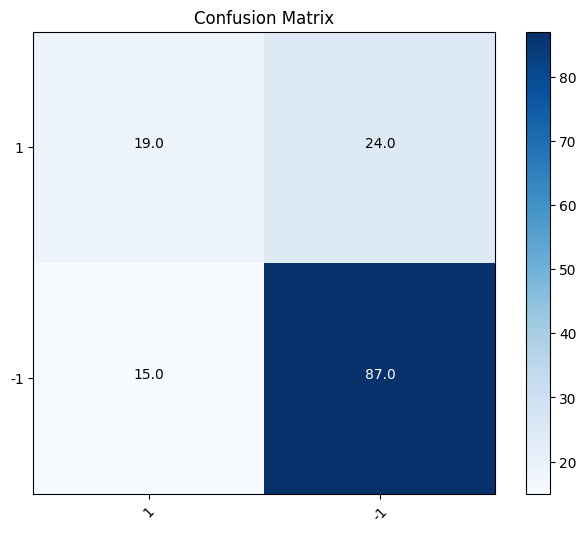

Perceptron:


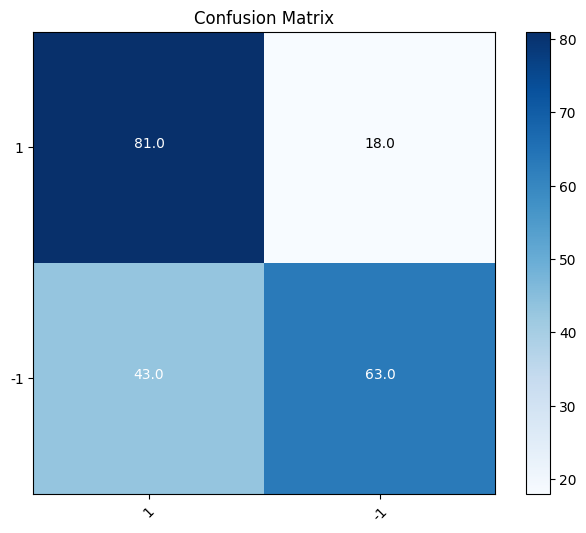

In [53]:
# TODO
cm = confusion_matrix(actual=by_val,predicted=bayes_predictions, labels=[1,-1])
print('Bayes:')
plot_confusion_matrix(cm,labels=[1,-1])
cm = confusion_matrix(actual=py_val,predicted=perc_predictions, labels=[1,-1])
print('Perceptron:')
plot_confusion_matrix(cm,labels=[1,-1])

### Calculate metrics

In [54]:
# TODO
cm = confusion_matrix(by_val,bayes_predictions, labels=[1,-1])
print('Bayes accuracy:',accuracy_score(by_val,bayes_predictions))
print('Bayes Recall:',recall_score(cm))
print('Bayes Precision:',precision_score(cm))
print('Bayes F1:',f1_score(cm))
        
cm = confusion_matrix(py_val,perc_predictions, labels=[1,-1])
print('Perceptron accuracy:',accuracy_score(py_val,perc_predictions))
print('Perceptron Recall:',recall_score(cm))
print('Perceptron Precision:',precision_score(cm))
print('Perceptron F1:',f1_score(cm))

Bayes accuracy: 0.7310344827586207
Bayes Recall: 0.6474008207934336
Bayes Precision: 0.6713036565977742
Bayes F1: 0.6552039509785987
Perceptron accuracy: 0.7024390243902439
Perceptron Recall: 0.7062607204116638
Perceptron Precision: 0.7155017921146953
Perceptron F1: 0.7001270952734946


## Second dataset

### Load data

In [100]:
df = pd.read_csv("./Imbalanced_Datasets/2.csv")

In [101]:
X = df.drop('target', axis=1)
y = df['target'].replace(0, -1)

In [102]:
cont_features = [feature for feature in X.columns if len(df2[feature].unique()) > 25]
discrete_features = [feature for feature in X.columns if len(df2[feature].unique()) <= 25]

### Find the distribution


Find the number of samples from each target label.

In [103]:
# TODO
print(df['target'].unique())
for i in df['target'].unique():
    print(f'class {i}: ', df[df['target'] == i].shape[0])

[0 1]
class 0:  499
class 1:  126


### Split data

In [104]:
bX_train, bX_val = X.iloc[:int(row_count*0.8)], X.iloc[int(row_count*0.8):]
by_train, by_val = y.iloc[:int(row_count*0.8)].to_numpy(), y.iloc[int(row_count*0.8):].to_numpy()

### Train model and make predictions

In [108]:
# TODO
mixed_nb = MixedDataNB()
mixed_nb.fit(bX_train[discrete_features], bX_train[cont_features], by_train)
predictions = mixed_nb.predict(bX_val[discrete_features], bX_val[cont_features])
bayes_predictions2 = predictions
X = df.drop('target', axis=1)
y = df['target'].replace(0, -1)
bias_column = (np.ones(X.shape[0]) * -1).reshape(X.shape[0],1)
X = np.concatenate([X,bias_column], axis=1)
row_count = X.shape[0]
pX_train, pX_val, py_train, py_val = X[:int(row_count*0.8)],X[int(row_count*0.8):], y[:int(row_count*0.8)], y[int(row_count*0.8):]
w = perceptron_sgd(pX_train,py_train)
predictions = list(map(check,np.dot(pX_val,w)))
perc_predictions2 = predictions

### Plot confusion matrix

Bayes:


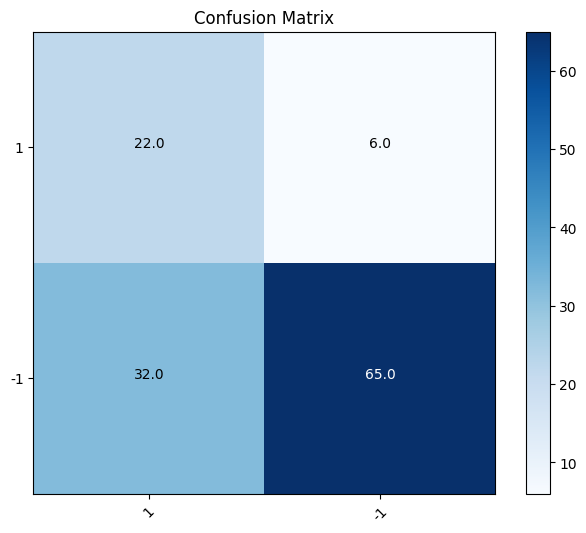

Perceptron:


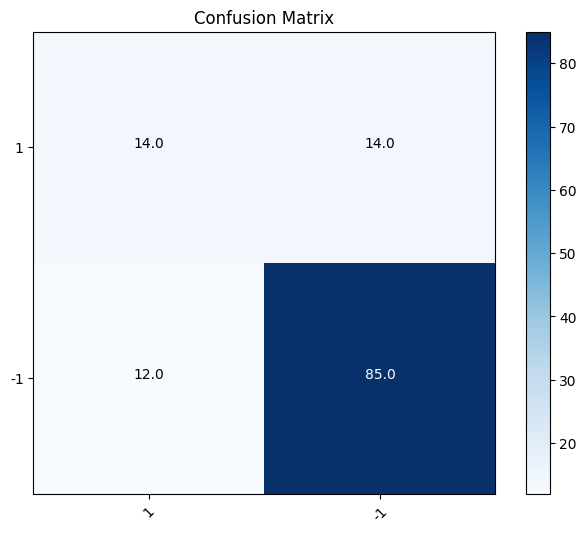

In [109]:
# TODO
cm = confusion_matrix(actual=by_val,predicted=bayes_predictions2, labels=[1,-1])
print('Bayes:')
plot_confusion_matrix(cm,labels=[1,-1])
cm = confusion_matrix(actual=py_val,predicted=perc_predictions2, labels=[1,-1])
print('Perceptron:')
plot_confusion_matrix(cm,labels=[1,-1])

### Calculate metrics

In [110]:
# TODO
cm = confusion_matrix(by_val,bayes_predictions2, labels=[1,-1])
print('Bayes accuracy:',accuracy_score(by_val,bayes_predictions2))
print('Bayes Recall:',recall_score(cm))
print('Bayes Precision:',precision_score(cm))
print('Bayes F1:',f1_score(cm))
        
cm = confusion_matrix(py_val,perc_predictions2, labels=[1,-1])
print('Perceptron accuracy:',accuracy_score(py_val,perc_predictions2))
print('Perceptron Recall:',recall_score(cm))
print('Perceptron Precision:',precision_score(cm))
print('Perceptron F1:',f1_score(cm))

Bayes accuracy: 0.696
Bayes Recall: 0.7279086892488954
Bayes Precision: 0.6614501825769431
Bayes F1: 0.6551974448315911
Perceptron accuracy: 0.792
Perceptron Recall: 0.6881443298969072
Perceptron Precision: 0.6985236985236984
Perceptron F1: 0.6929327286470144


## Third dataset

### Load data

In [111]:
df = pd.read_csv("./Imbalanced_Datasets/3.csv")

In [112]:
X = df.drop('target', axis=1)
y = df['target'].replace(0, -1)

### Find the distribution


Find the number of samples from each target label.

In [113]:
# TODO
print(df['target'].unique())
for i in df['target'].unique():
    print(f'class {i}: ', df[df['target'] == i].shape[0])

[0 1]
class 0:  499
class 1:  26


### Split data

In [114]:
bX_train, bX_val = X.iloc[:int(row_count*0.8)], X.iloc[int(row_count*0.8):]
by_train, by_val = y.iloc[:int(row_count*0.8)].to_numpy(), y.iloc[int(row_count*0.8):].to_numpy()

### Train model and make predictions

Bayes:


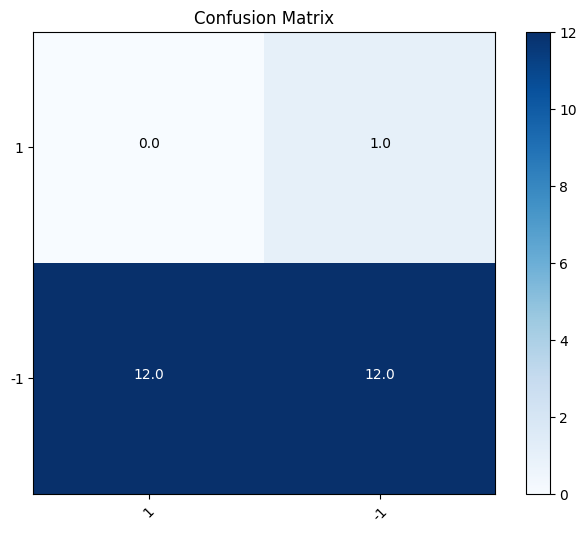

Perceptron:


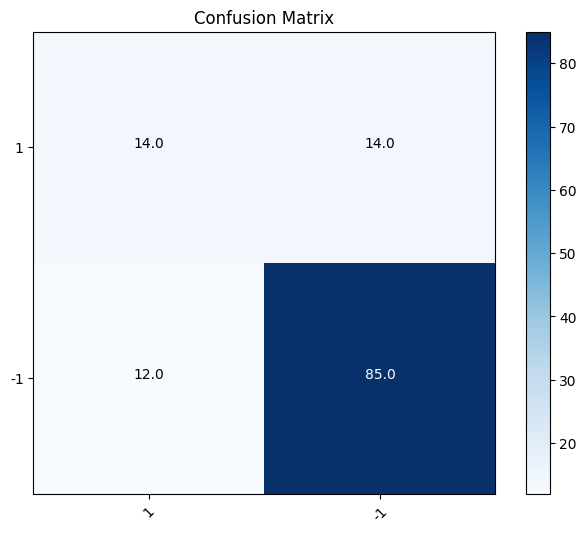

In [115]:
# TODO
cm = confusion_matrix(actual=by_val,predicted=bayes_predictions, labels=[1,-1])
print('Bayes:')
plot_confusion_matrix(cm,labels=[1,-1])
cm = confusion_matrix(actual=py_val,predicted=perc_predictions, labels=[1,-1])
print('Perceptron:')
plot_confusion_matrix(cm,labels=[1,-1])

### Plot confusion matrix

Bayes:


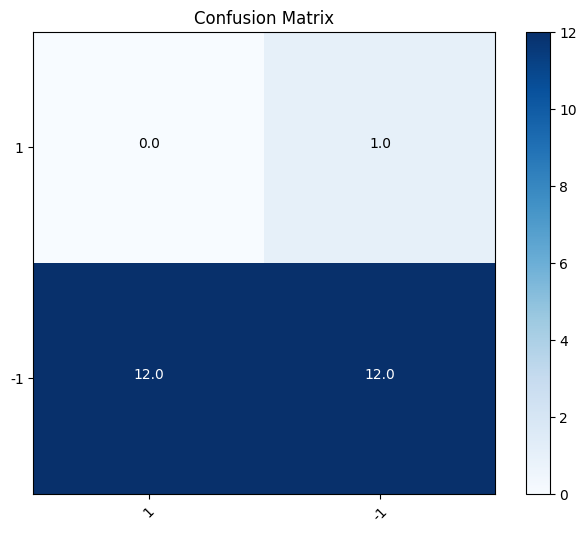

Perceptron:


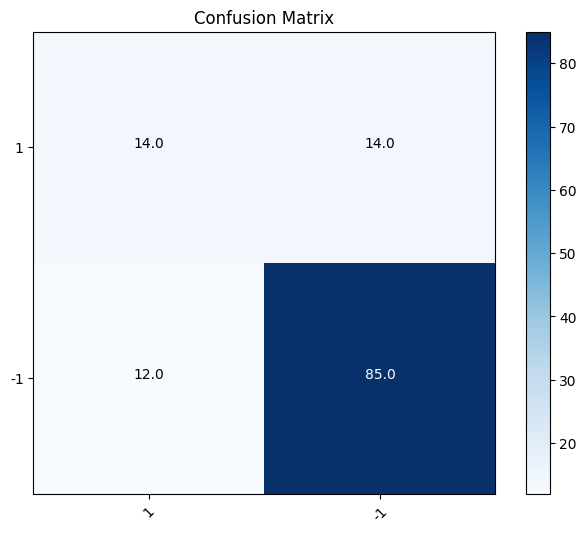

In [116]:
# TODO
cm = confusion_matrix(actual=by_val,predicted=bayes_predictions, labels=[1,-1])
print('Bayes:')
plot_confusion_matrix(cm,labels=[1,-1])
cm = confusion_matrix(actual=py_val,predicted=perc_predictions, labels=[1,-1])
print('Perceptron:')
plot_confusion_matrix(cm,labels=[1,-1])

### Calculate metrics

In [117]:
# TODO
cm = confusion_matrix(by_val,bayes_predictions, labels=[1,-1])
print('Bayes accuracy:',accuracy_score(by_val,bayes_predictions))
print('Bayes Recall:',recall_score(cm))
print('Bayes Precision:',precision_score(cm))
print('Bayes F1:',f1_score(cm))
        
cm = confusion_matrix(py_val,perc_predictions, labels=[1,-1])
print('Perceptron accuracy:',accuracy_score(py_val,perc_predictions))
print('Perceptron Recall:',recall_score(cm))
print('Perceptron Precision:',precision_score(cm))
print('Perceptron F1:',f1_score(cm))

Bayes accuracy: 0.48
Bayes Recall: 0.25
Bayes Precision: 0.46153846153846156
Bayes F1: 0.32432432432432434
Perceptron accuracy: 0.792
Perceptron Recall: 0.6881443298969072
Perceptron Precision: 0.6985236985236984
Perceptron F1: 0.6929327286470144


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_22895/2795995528.py:7: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**

f1 score برای دیتاستهای آنبالانس بهتره